# 第五章 非线性分类器
---

## 二轮总结笔记


### 一、分段线性判别函数

#### 1. 分段线性距离分类器

##### (1) 条件

每个子类**单峰分布**、**各维度上的分布基本对称**、**先验概率基本相同**。

##### (2) 判别函数

$\omega_i$类划分为$l_i$个子类，对于样本$\mathbf{x}$，第$\omega_i$类的判别函数为

$$
g_i(\mathbf{x}) = \min\limits_{l = 1,\cdots,l_i}||\mathbf{x}-\mathbf{m}_i^l||, \quad i=1,\cdots,c
$$

##### (3) 判别规则

$$
若g_k(\mathbf{x}) = \min\limits_{i=1,\cdots,c}g_i(\mathbf{x})，则\mathbf{x}\in\omega_k
$$

#### 2、一般的分段线性判别函数

#### (1) 判别函数

$\omega_i$类划分为$l_i$个子类，对于样本$\mathbf{x}$，第$\omega_i$类的判别函数为

$$
g_i(\mathbf{x}) = \max\limits_{l = 1,\cdots,l_i}\mathbf{w}_i^l\cdot\mathbf{x} + w_{i0}^l = \boldsymbol{\alpha}_i^l\cdot\mathbf{y}, \quad l=1,\cdots,l_i
$$

#### (2) 判别规则

$$
若g_k(\mathbf{x}) = \max\limits_{i=1,\cdots,c}g_i(\mathbf{x})，则\mathbf{x}\in\omega_k
$$


#### (3) 决策面

$\omega_i$和$\omega_j$两类间的决策面由多个分段的超平面组成，每一段都是$\omega_i$的一个子类和$\omega_j$中相邻的子类的分类面

#### (4) 子类划分方法

1. 人工划分


2. 聚类划分


3. 错误修正法：
+ 对于类$\omega_i$，每次只修正$g_i^l(\mathbf{x})$**最大**的子类的**权值**
+ 对于错分样本，正确的最大子类的**权值**加，错分的最大子类的**权值**减
+ 迭代直到收敛

#### 3. 分类树

##### (1) 思想

用两类线性判别逐步二分判别区域

##### (2) 初始权向量

1. 分类树对初始权向量的选择很敏感
2. 可以选择两类的**欧氏距离**最小的一对样本的**垂直平分面**的**法向量**作为权向量$\boldsymbol{\alpha}$初始值


### 二、二次判别函数

#### 1. 判别函数

$$
g(\mathbf{x}) = \mathbf{x}^\text{T}\mathbf{Wx} + \mathbf{w}^\text{T}\mathbf{x} + w_0,\quad \mathbf{W}是实对称阵
$$

#### 2. 每一类都是正态分布的情况

1. 判别函数：

$$\begin{aligned}
g_i(\mathbf{x}) &= K_i^2-(\mathbf{x}-\mathbf{m}_i)^\text{T}\boldsymbol{\Sigma}_i^{-1}(\mathbf{x}-\mathbf{m}_i) \\
\hat{\mathbf{m}}_i &= \frac{1}{N_i}\sum_{j=1}^{N_i}\mathbf{x}_j \\
\hat{\boldsymbol{\Sigma}}_i &= \frac{1}{N_i-1}\sum_{j=1}^{N_i}(\mathbf{x}_j-\hat{\mathbf{m}}_i)(\mathbf{x}_j-\hat{\mathbf{m}}_i)^\text{T}
\end{aligned}$$

2. 阈值项$K_i^2$：

受**协方差矩阵**和**先验概率**的影响

3. 如果$\omega_1$分布成团（近似正态分布），$\omega_2$均匀的分布在$\omega_1$附近：

可以只对$\omega_1$类求判别函数，决策是比较样本到$\omega_1$类均值的**Mahalanobis距离**与阈值$K$的大小。

### 三、多层感知器神经网络

#### 1. Sigmoid函数

##### (1) 阶跃函数的逼近

$$\begin{aligned}
f(\alpha) &= \frac{1}{1+e^{-\alpha}} \\
f'(\alpha) &= f(\alpha)(f(\alpha)-1)
\end{aligned}$$

##### (2) 符号函数的逼近

$$\begin{aligned}
f(\alpha) &= \tanh(\alpha) = \frac{e^\alpha - e^{-\alpha}}{e^\alpha + e^{-\alpha}} = \frac{2}{1+e^{-2\alpha}} - 1 \\
f'(\alpha) &= 1-f^2(\alpha)
\end{aligned}$$

##### (3) Sigmoid函数的特点

1. 单调递增
2. 无限次可微
3. 权值较大时逼近阈值函数，权值较小时逼近线性函数

#### 2. 前馈神经网络的性质

任何一个$\mathbf{x}$到$y$的非线性映射，都存在一个适当结构的三层前馈神经网络能够以**任意精度**逼近它。

#### 3. 前向传播

$$
y_r = f(\sum_{s=1}^{n_{L-2}}w_{sr}^{l=L-1}\cdots f(\sum_{j=1}^{n_1}w_{jk}^{l=2}f(\sum_{i=1}^{n}w_{ij}^{l=1}x_i))),\quad r=1,\cdots,m
$$

其中$w_{ij}^l$是第$l-1$层的第$i$个神经元到第$l$层的第$j$个神经元连接的权值（从前到后）。

第$0$层是输入层，第$L-1$层是输出层，共$L$层。

#### 4. 反向传播

$$\begin{aligned}
\nabla w_{ij}^l &= -\Delta w_{ij}^l\\
\Delta w_{ij}^l &= \eta\delta_j^lx_i^{l-1}\\
若l为输出层：\delta_j^{l} &= y_j(1-y_j)(d_j-y_j)\\
若l为隐层：\delta_j^l &= x_j(1-x_j)\sum_{k=1}^{n_{l+1}}\delta_k^{l+1}w_{jk}^{l+1},\quad j=1,\cdots, n_l
\end{aligned}$$

#### 5. 注意事项

##### (1) 可能陷入局部极小点

##### (2) 初始权值

初始权值不能全为0，也不能全相同，应该用小随机数。

如果算法不收敛，可以尝试改变初始权值。

##### (3) 学习步长$\eta$

1. 步长太大，出现振荡而不能收敛或收敛很慢。
2. 步长太小，收敛太慢，容易停在局部极小点。
3. 可以在0.1~3中选。

##### (4) 可以加入记忆项（惯性项）


### 四、支持向量机（SVM）

#### 1. 对偶问题（dual problem）

$$\begin{aligned}
&\max\limits_{\boldsymbol{\alpha}} Q(\boldsymbol{\alpha}) = \sum_{i=1}^n\alpha_i - \frac{1}{2}\sum_{i,j=1}^n\alpha_i\alpha_jy_iy_jK(\mathbf{x}_i,\mathbf{x}_j)\\
&\text{s.t.}\sum_{i=1}^n\alpha_iy_i=0\\
&0\leqslant\alpha_i\leqslant C,\quad i=1,\cdots,n
\end{aligned}$$

#### 2. $b$求法

$b$用所有边界支持向量通过下面的公式求平均

$$
y_j\left(\sum_{i=1}^n\alpha_iy_iK(\mathbf{x}_i,\mathbf{x}_j) + b\right) - 1 = 0
$$

#### 3. 判别函数

$$
f(\mathbf{x}) = \text{sgn}\left(\sum_{i=1}^n\alpha_iy_iK(\mathbf{x}_i,\mathbf{x}) + b\right)
$$

#### 4. 核函数

##### (1) 核函数满足条件

1. Mercer定理：

对于任意的对称函数$K(\mathbf{x},\mathbf{x}')$，它是某个特征空间中的内积运算的**充分必要**条件是，对于**任意**的$\varphi\neq 0$，且$\displaystyle\int\varphi^2(\mathbf{x})\text{d}\mathbf{x} < \infty$，有

$$
\iint K(\mathbf{x},\mathbf{x}')\varphi(\mathbf{x})\varphi(\mathbf{x}')\text{d}\mathbf{x}\text{d}\mathbf{x}' > 0
$$

2. 正定核：

如果$K(\mathbf{x},\mathbf{x'})$是定义在空间$X$上的对称函数，且对于任意的训练数据$\mathbf{x}_1,\cdots,\mathbf{x}_m\in X$和任意的实系数$a_1,\cdots,a_m\in R$，都有

$$
\sum_{i,j}a_ia_jK(\mathbf{x}_i,\mathbf{x}_j) \geqslant 0
$$

则一定存在一个从$X$空间到内积空间$H$的变换，使得

$$
K(\mathbf{x},\mathbf{x}') = \varphi(\mathbf{x})\cdot\varphi(\mathbf{x}')
$$

##### (2) 常用核函数

1. 多项式核函数：

$$
K(\mathbf{x},\mathbf{x}') = ((\mathbf{x}\cdot\mathbf{x}')+1)^q
$$

2. 径向基（RBF）核函数：

$$
K(\mathbf{x},\mathbf{x}') = \exp\left(-\frac{||\mathbf{x}-\mathbf{x}'||^2}{\sigma^2}\right)
$$

决策函数形式与径向基网络形式相同，每个**支持向量**是一个径向基函数的**中心**。RBF把样本映射到无穷维。

3. Sigmoid函数：

$$
K(\mathbf{x},\mathbf{x}') = \tanh(v(\mathbf{x}\cdot\mathbf{x}')+c)
$$

$v$和$c$在一定取值时等价于一个隐层的多层感知器神经网络，**支持向量**个数等于**隐层节点**个数。

#### 5. 特点

1. SVM对核函数的选择具有一定**不敏感**性。
2. 能在样本**数量少**、特征**维数高**的情况下有好的推广能力。
3. 可以看作是对支持向量的**相似性比较**的加权求和。

### 五、核函数机器

#### 1. 核Fisher判别（KFD）

##### (1) 准则函数

$$
J(\boldsymbol{\alpha}) = \frac{\boldsymbol{\alpha}^\text{T}\mathbf{M}\boldsymbol{\alpha}}{\boldsymbol{\alpha}^\text{T}\mathbf{N}\boldsymbol{\alpha}} \\
$$

其中

$$\begin{aligned}
\mathbf{M}_i &= \frac{1}{l_i}\sum_{k=1}^{l_i}
    \left[\begin{matrix}
        K(\mathbf{x}_1, \mathbf{x}_k^i)\\ 
        K(\mathbf{x}_2, \mathbf{x}_k^i)\\
        \vdots \\
        K(\mathbf{x}_l, \mathbf{x}_k^i)
    \end{matrix}\right]\\
\mathbf{M} &= (\mathbf{M}_1-\mathbf{M}_2)(\mathbf{M}_1-\mathbf{M}_2)^\text{T}\\
\mathbf{K}_j &= 
    \left[\begin{matrix}
        K(\mathbf{x}_1,\mathbf{x}_1^j) & K(\mathbf{x}_1,\mathbf{x}_2^j) & \cdots & K(\mathbf{x}_1,\mathbf{x}_{l_j}^j)\\
        K(\mathbf{x}_2,\mathbf{x}_1^j) & K(\mathbf{x}_2,\mathbf{x}_2^j) & \cdots & K(\mathbf{x}_2,\mathbf{x}_{l_j}^j)\\
        \vdots &\vdots &&\vdots\\
        K(\mathbf{x}_l,\mathbf{x}_1^j) & K(\mathbf{x}_l,\mathbf{x}_2^j) & \cdots & K(\mathbf{x}_l,\mathbf{x}_{l_j}^j)\\
    \end{matrix}\right]\\
\mathbf{N} &= \sum_{j=1,2}\mathbf{K}_j(\mathbf{I} - \mathbf{1}_{l_j})\mathbf{K}_j^\text{T}
\end{aligned}$$

总共样本数为$l$，第$j$类的样本数为$l_j$。

$\mathbf{K}_j$称为第$j$类的核函数矩阵，大小为$(l\times l_j)$。

$\mathbf{I}$是单位矩阵，$\mathbf{1}_{l_j}$是所有元素都为$\displaystyle\frac{1}{l_j}$的矩阵。

##### (2) $\boldsymbol{\alpha}$最优解求法

$$
\boldsymbol{\alpha} \propto \mathbf{N}^{-1}(\mathbf{M}_1-\mathbf{M}_2)
$$

##### (3) 投影

任意样本投影到Fisher判别方向

$$
<\mathbf{w},\Phi(\mathbf{x})> = \sum_{i=1}^l\alpha_iK(\mathbf{x}_i,\mathbf{x})
$$

##### (5) 处理$\mathbf{N}$不正定

引入$\mathbf{N}_\mu=\mathbf{N}+\mu\mathbf{I}$使$\mathbf{N}_\mu$正定，同时实现对$||\boldsymbol{\alpha}||^2$的正则化控制，类似于支持向量机中控制间隔的作用。

##### (6) 性质

KFD对噪声不敏感，效果与SVM相当或优于SVM。

---

## 一轮学习笔记（包含代码实现）

首先导包，生成数据

X是样本矩阵，每一行是一个样本。

real_class是样本的真实类别，共有两类，用1，-1表示。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.r_[
    np.random.randn(20, 2) + [-3.0, -3.0],
    np.random.randn(20, 2) + [3.0, 3.0],
    np.random.randn(20, 2) + [-3.0, 3.0],
    np.random.randn(60, 2) + [2.5, -2.5],
]
real_class = 60 * [1] + 60 * [-1]

print(X)
print(real_class)

[[-3.32230884 -3.15929606]
 [-3.33801456 -1.46493056]
 [-4.09559989 -2.71803997]
 [-0.27242868 -2.53134301]
 [-4.69217742 -2.51190383]
 [-1.95813538 -3.49081283]
 [-1.31743467 -3.33114835]
 [-5.16434152 -1.81926517]
 [-1.75787399 -3.76405726]
 [-3.64513249 -2.51811866]
 [-3.19612961 -3.34086811]
 [-6.13684187 -4.01138663]
 [-5.51131108 -2.50206053]
 [-3.0185968  -2.23002996]
 [-3.13568758 -2.3823326 ]
 [-5.53293217 -3.47074792]
 [-4.04925624 -2.68868371]
 [-5.62445333 -3.93154145]
 [-2.63900534 -1.51121725]
 [-2.99534198 -3.04341633]
 [ 3.24414973  2.43493008]
 [ 1.40765888  3.4343428 ]
 [ 2.52874893  2.59659748]
 [ 1.79599324  3.89924299]
 [ 3.62281569  2.50674289]
 [ 0.80929942  3.62849513]
 [ 3.33829642  2.70988214]
 [ 3.30946082  3.3366679 ]
 [ 2.11170457  2.64130368]
 [ 1.81030922  3.01603659]
 [ 3.73302955  3.17097706]
 [ 3.34476511  4.98309974]
 [ 3.66468783  2.56137121]
 [ 2.71409042  4.85833453]
 [ 2.91677989  2.99012467]
 [ 1.79693955  2.19074395]
 [ 3.67233595  2.51404579]
 

下面生成图像，显然1类由三个线性可分的子类构成，-1类由一个类构成

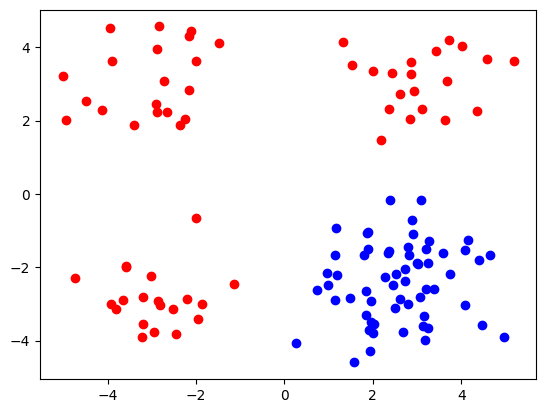

In [2]:
for i in range(120):
    if real_class[i] == -1:
        plt.scatter(X[i][0], X[i][1], c='b')
    else:
        plt.scatter(X[i][0], X[i][1], c='r')

plt.show()

### 一、分段线性判别函数

分段线性判别函数的思想时把每个类$\omega_i$分为$l_i$个子类$\omega_i^1, \omega_i^2, \cdots, \omega_i^{l_i}$，然后把这些子类通过线性分类器分别进行判别。

#### 1. 分段线性距离分类器

这个分类器的思想就是算出每个子类$\omega_i^l$的均值$\mathbf{m}_i^l$，然后比较样本到均值的距离$||\mathbf{x} - \mathbf{m}_i^l||$，找最近的类别作为该样本的分类。这个算法思想非常简单，我就不写了。

#### 2. 一般的分段线性判别函数

这个分类器的思想是划分出子类之后，把每个子类的线性判别函数$g_i^l(\mathbf{y}) = \boldsymbol{\alpha}_i^l\cdot\mathbf{y}$算出来，然后根据判别函数进行分类，判别函数数值最大的就是样本所在的类。（这里的$\mathbf{y}$是增广后的样本，参见上一章）。

现在的核心问题是如何划分子类，书上给出了三种方法。

第一种是根据经验人为划分，或者可以用聚类算法划分。

第二种是边求权向量$\boldsymbol{\alpha_i^l}$边划分，算法如下：

1. 给定每个类别的子类数目（人为猜的），并且初始化每个子类的权向量$\boldsymbol{\alpha}_i^l$（用小的随机数即可）
2. 考察一个属于$\omega_j$类的训练样本$\mathbf{y}$，找出$\omega_j$类的子类中线性判别函数（$\boldsymbol{\alpha}_j^m\cdot\mathbf{y}$）的值最大的子类，假设是第$m$个子类
3. 如果刚求出的这个最大的线性判别函数的值比**其他所有类的所有子类**的线性判别函数的值**都大**，即$\boldsymbol{\alpha}_j^m \cdot\mathbf{y}>\boldsymbol{\alpha}_i^l\cdot \mathbf{y}, \forall i = 1,\cdots, c, i \neq j, l = 1, \cdots, l_i$，说明当前样本没有被错分，那么考察下一个样本
4. 否则就更新两个子类的权值。更新的两个子类有说法，要特别注意：更新的是**当前样本所属的类别的线性判别函数值最大的子类**和**当前样本被错分的类别的线性判别函数值最大的子类**。更新规则如下：

$$\begin{aligned}
\boldsymbol{\alpha}_j^m &+= \rho\mathbf{y}，\omega_j是当前样本属于的类\\
\boldsymbol{\alpha}_i^n &-= \rho\mathbf{y}，\omega_i是当前样本被错分的类\\
\end{aligned}$$
$$\begin{aligned}
&即\boldsymbol{\alpha}_j^m \cdot\mathbf{y}\leqslant\boldsymbol{\alpha}_i^n\cdot \mathbf{y}\\
&m是\omega_j中线性判别函数最大的子类序号\\
&n是\omega_i中线性判别函数最大的子类序号
\end{aligned}$$

对于线性不可分的情况，可以使训练步长$\rho$逐渐变小来使算法强制收敛。（书里也没说具体怎么变小）

前面给出的数据集对于每个子类都是线性可分的，所以下面的算法里把$\rho$设为1了。

这种方法没有人为的划分子类，只是指定了子类的数量，样本属于哪个子类其实是自动划分的

求权向量实现代码如下：

In [6]:
def augment_matrix(_X: np.ndarray) -> np.ndarray:
    """
    将样本X矩阵增广为Y
    :param _X: 原样本矩阵
    :return: 增广后的样本矩阵
    """
    return np.concatenate((np.ones((_X.shape[0], 1)), _X), 1)

def get_alpha_piecewise_linear(_X: list[np.ndarray], _subclass_number: list[int]) -> (list[np.ndarray], int):
    """
    计算出每个子类的权向量
    :param _X: 每个类别的样本矩阵列表（增广前） _X[i]表示第i类的样本矩阵
    :param _subclass_number: 每个类别分出来的子类数量（一维向量） _subclass_number[i] = j表示第i类有j个子类
    :return: 每个子类的权向量数组 return[i][j]表示第i类的第j个子类的权向量
    """
    # 先求出每个类别样本的增广矩阵
    _Y: list[np.ndarray] = []
    N = 0  # 样本总数
    for _Xi in _X:
        _Y.append(augment_matrix(_Xi))
        N += _Y[-1].shape[0]

    d = _Y[0].shape[1]  # 样本维数
    c = len(_Y)         # 种类数量

    # 初始化权向量列表（随机数）
    _alphas: list[np.ndarray] = []
    for i in range(c):
        _alphas.append(np.random.randn(_subclass_number[i], d))

    # 下面开始考察每一个样本
    _iters = 0
    i, j, n = 0, 0, 0
    while n < N:
        if j >= _Y[i].shape[0]:
            i += 1
            j = 0
            if i >= c:
                i = 0
        # 当前考察的样本属于第i类
        max_g_of_right_class_value = -9999999
        max_g_of_right_class_index = 0
        g = _Y[i][j] @ _alphas[i].T
        for k in range(_subclass_number[i]):
            if g[k] > max_g_of_right_class_value:
                max_g_of_right_class_index = k
                max_g_of_right_class_value = g[k]

        # 考察每一个除了i之外的类别，计算判别函数，比较是否分类错误
        for k in range(c):
            if k == i:
                continue
            max_g_of_wrong_class_value = -9999999
            max_g_of_wrong_class_index = 0
            g = _Y[i][j] @ _alphas[k].T
            for l in range(_subclass_number[k]):
                if g[l] > max_g_of_wrong_class_value:
                    max_g_of_wrong_class_value = g[l]
                    max_g_of_wrong_class_index = l
            if max_g_of_wrong_class_value >= max_g_of_right_class_value:
                # 如果分类错误，则要更新权向量
                n = -1
                _iters += 1
                _alphas[i][max_g_of_right_class_index] += _Y[i][j]
                _alphas[k][max_g_of_wrong_class_index] -= _Y[i][j]
                break
            if _iters >= 100000:
                raise Exception('迭代100000次还不收敛，数据可能不是线性可分的')
        n += 1
        j += 1
    return _alphas, _iters

In [23]:
alphas, iters = get_alpha_piecewise_linear([X[:60], X[60:]], [3, 1])
print("第一类的所有子类的权向量（每一行是一个权向量）：\n", alphas[0])
print("第二类的所有子类的权向量（每一行是一个权向量）：\n", alphas[1])
print("迭代次数：", iters)

第一类的所有子类的权向量（每一行是一个权向量）：
 [[ 1.01848496e+00 -8.15113173e+00 -4.12926837e+00]
 [ 2.54386312e-01 -4.02457777e-01 -3.15953573e-03]
 [ 9.42934212e-01  1.35783124e+00  1.20361148e+01]]
第二类的所有子类的权向量（每一行是一个权向量）：
 [[-1.32262581  6.66700246 -6.23387516]]
迭代次数： 13


分类就比较好写了，直接计算所有类的所有子类的判别函数，找出最大的，判断样本属于最大的判别函数的类别

In [28]:
g_matrix = augment_matrix(X) @ np.concatenate([alphas[0], alphas[1]]).T
ans_piecewise_linear = []  # 最终的两类分类结果
ans_subclass = []          # 这个数组记录了样本分类到了哪个子类

# 找出最大的判别函数
for row in g_matrix:
    maxn = -99999
    subclass_of_this_sample = 0
    for i, g in enumerate(row):
        if maxn < g:
            subclass_of_this_sample = i
            maxn = g
    ans_subclass.append(subclass_of_this_sample)

print("这个数组显示了每个样本被分到了哪个子类（0，1，2是第一类的子类，3是第二类的子类）\n", ans_subclass)

# 接下来求出最终的分类结果

for sample in ans_subclass:
    if sample < 3:
        ans_piecewise_linear.append(1)
    else:
        ans_piecewise_linear.append(-1)

ans_piecewise_linear = np.array(ans_piecewise_linear)
print("最终分类结果：", ans_piecewise_linear)
print("正确率：", 1 - np.sum(abs(ans_piecewise_linear - real_class)) / 2 / X.shape[0])


这个数组显示了每个样本被分到了哪个子类（0，1，2是第一类的子类，3是第二类的子类）
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
最终分类结果： [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
正确率： 1.0


通过上面的结果我们可以明显看出，虽然我的数据生成的时候有意的把第一类分成了三个线性可分的子类（每20个数据属于一个子类），但是由于上面的算法是自动划分子类，最终第一大类的样本并没有像预期那样，均匀的划分为三个子类。但是这并不影响最终结果的正确性。

第三种是分治的思想，通过分类树来一步一步进行。每次都把当前分类的部分用两类线性判别算法分出来，最后形成一棵分类的二叉树。
这个方法书上只简单的介绍了一下，而且实际操作中会有很多问题要解决。另外根据我的估算就算实现了这个算法效果也不好，会有非常严重的过拟合问题。所以我就不在这个算法上浪费时间了。

### 二. 二次判别函数

书上就简单提了一下，总体思想就是样本到均值的马氏距离的平方和固定阈值的比较。书中连阈值怎么求都没解释，这节也可以略过。

### 三、多层感知机神经网络

这个算法吴恩达的网课里面Course 2里面讲了，看不懂书可以去看看他的课，讲的很清楚。下面实现的神经网络的数据也用的吴恩达网课里面的。

#### 1. 感知机神经网络的结构

第$0$层是输入层，输入层每个神经元对应样本的一个维度的数值（$n$维样本的输入层有$n$个神经元）。

最后一层是输出层，假设有$m$个神经元（具体有多少个需要根据实际问题来定）。

中间层是隐藏层，每层有多少个神经元、共有多少隐藏层是神经网络模型研究的主要内容。

运算时，先根据前向传播(forward propagation)算出实际输出，再根据反向传播(back propagation)逐层求导进行梯度下降。

#### 2. 前向传播和反向传播

前向传播很好理解，就是一层一层算出每个神经元的输出，最终得到结果。

关于反向传播书中解释的非常不清楚，只是给了文字描述和最终的公式，没有中间的推导。吴恩达的网课干脆就没说反向传播怎么求，直接用Tensorflow。

我看了这个视频 [[5分钟深度学习] #02 反向传播算法](https://www.bilibili.com/video/BV1yG411x7Cc/?spm_id_from=333.880.my_history.page.click&vd_source=1f794c2cb7986b517be16024bfd2e263)，再自己推导了一下才理解反向传播到底是怎么回事。

反向传播其实就是对于每一层都求**输出层的输出**对**当前层的权向量**的偏导数，根据这个偏导数对当前层的权向量进行梯度下降。这个偏导数具体的求法就利用了求导的链式法则，可以用当前层后面的所有层的偏导数求出这一层的偏导数，有一个累加的过程。

这个偏导数可以再次拆开，变成对于每一层都求**当前层的输出**对**当前层的权向量**的偏导数，这实际上就是根据链式求导法则把前面的偏导数拆开了。那么我们根据这个偏导数对每一层的权向量进行梯度下降，最终就可以把误差传播回输入层。

转化为公式就是书中96页的公式$(5-27)$。至于这个公式里面的$x_j^l(1-x_j^l)$是怎么来的，是因为书中所有的神经元的激活函数都是$sigmoid$函数，对$y = sigmoid(x)$进行求导，结果就是$y' = y(y - 1)$；算法是梯度下降，所以还要加个负号。

书上的反向传播的公式非常非常难理解，一定要手动画一个网络，把各种$i,j,k$序号带入到公式里面，手算一边，这样才能理解这些公式的含义。

#### 3. 算法实现

1. 确定神经网络结构（几层，多少神经元），然后用**小随机数**初始化权值。

假设神经网络有$L$层，第$l$层的有$n_l$个神经元。特别的，规定第$0$层为输入层，第$L-1$层为输出层。

2. 从训练样本中按随机顺序找一个样本$\mathbf{x} = [x_1, x_2, \cdots, x_n]^\text{T}$，这个样本即为第$0$层（输入层）的输出。

注意这里的样本是增广过的。也就是在原来的维数基础上加一个维度，并且这个维度设为常量$1$。

我们假设他的期望输出是$\mathbf{d} = [d_1,d_2,\cdots, d_m]^\text{T}$。

注意这个期望输出是人为设计的，比如对于二分类问题，最后的期望输出$\mathbf{d}$只有一维，取值可以为$1$或$-1$，分别对应两个分类。

3. 计算当前样本前向传播的最终输出（很奇怪书上的公式为什么不用向量表示，我这里用向量写了一下）

$$\begin{aligned}
\mathbf{x}^l &=  f(\mathbf{W}^{l}\mathbf{x}^{l-1}), \quad i = 1, 2, \cdots, L-1\\
\mathbf{y} &= \mathbf{x}^{L-1}\\
f(\mathbf{x}) &= \frac{1}{1+e^{-\mathbf{x}}}
\end{aligned}$$

其中

$$\begin{aligned}
&\mathbf{x}^l表示第l层输出。特别的，\mathbf{x}^0是输入层输出，是一个样本\\
&\mathbf{y}是输出层输出，即最终结果\\
&\mathbf{W}^l = \left[\begin{matrix}(\mathbf{w}_1^l)^\text{T} \\ (\mathbf{w}_1^2)^\text{T} \\ \vdots \\ (\mathbf{w}_{n_l}^l)^\text{T}\end{matrix}\right] \quad\mathbf{w}_j^l表示第l层的第j个神经元的权向量\\
&即\mathbf{W}^l的第j\textbf{行}是第l层的第j个神经元的权向量
\end{aligned}$$

4. 通过反向传播更新每个神经元的权值（反向传播的公式也被我改成了向量版本）

先特别解释一下引入的运算规则（Hadamard乘积）：两个$n$维向量$\mathbf{x}\odot\mathbf{y} = [x_1y_1, x_2y_2, \cdots, x_ny_n]^\text{T}$

$$\begin{aligned}
\mathbf{w}_j^l &= \mathbf{w}_j^l + \Delta\mathbf{w}_j^l\\
\Delta\mathbf{w}_j^l &= \eta\delta_j^l\mathbf{x}^{l-1} \\
\boldsymbol{\delta}^{L-1} &= \mathbf{y}\odot(1-\mathbf{y})\odot(\mathbf{d}-\mathbf{y})\\
\boldsymbol{\delta}^l &= \mathbf{x}^l \odot (1-\mathbf{x}^l) \odot ((\mathbf{W}^{l+1})^\text{T}\boldsymbol{\delta}^{l+1})
\end{aligned}$$

其中

$$\begin{aligned}
& \delta_j^l表示第l层的第j个神经元的梯度\\
& \boldsymbol{\delta}^l = [\delta_1^l, \delta_2^l,\cdots, \delta_{n_l}^l]^\text{T} \\
& 即\boldsymbol{\delta}^l表示每一层所有神经元的梯度构成的向量
\end{aligned}$$

##### 反向传播算法的总结

总结一下，根据上面的公式，在后向传播中，每一层的$\boldsymbol{\delta}^l$都取决于下一层的$\boldsymbol{\delta}^{l+1}$、下一层的权向量$\mathbf{W}^{l+1}$和本层的输出$\mathbf{x}^l$。

而每一层的权向量梯度$\Delta\mathbf{W}^l$则取决于上面算出来的本层的$\boldsymbol{\delta}^l$和上一层的输出$\mathbf{x}^{l-1}$。

并且要注意输入层没有$\mathbf{W}^l$和$\boldsymbol{\delta}^l$。

我用了快两个小时才把书上用求和符号表示的公式翻译成用向量和矩阵表示的。如果不用向量，不用numpy，速度会非常非常慢。

用代码实现之前还要强调一下，numpy中的向量是**行向量**，而书中的公式推导中使用**列向量**，也就是说我们在代码中实现的向量实际上是公式中的向量的转置。numpy的风格就是用行向量，而大多数教材的公式推导都是用列向量，写代码时要注意切换思维。

代码实现如下：

In [3]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    """
    计算sigmoid函数值
    :param x: 自变量（可以为向量或矩阵）
    :return: 函数值
    """
    return 1.0 / (1.0 + np.exp(-x))


class NeuralNetwork:
    """
    由于神经网络有很多内部变量，不适合写函数面向过程编程，所以我写了一个类。
    """
    def __init__(self, layers: int, neurons_of_layers: list[int]):
        """
        构造函数
        :param layers: 神经网络的层数（包含输入层）
        :param neurons_of_layers: 每层的神经元数量（包含输入层），neurons_of_layers[i] = j表示第i层有j个神经元
        :param eta: 学习步长（即书中的希腊字母eta）
        """

        self._layers = []
        """
        self.layers用来存放每层的数据
        如果self.layers[i] = { "W": [[1, 2, 3], [4, 5, 6]], "x": [-1, -2], "delta": [7, 8], "neurons": 2 }
        neurons表示第i层有两个神经元
        W表示第一个神经元的权向量是[1, 2, 3]，第二个神经元的权向量是[4, 5, 6]。
        x表示第i层两个神经元输出值是-1和-2，算出来的delta（公式里的希腊字母delta）分别为7和8
        x通过前向传播来算
        delta通过反向传播来算
        """

        if layers <= 2:
            raise Exception("神经网络至少有三层（包含一个隐层）")

        if len(neurons_of_layers) != layers:
            raise Exception("neurons_of_layers参数中包含的层数应该和layers一致")

        self._eta = 0.05
        self._real_y = None
        """
        real_y是实际的类别（期望输出）
        """

        self._epochs = 0
        """
        32轮训练是一个epoch，每轮训练就是把所有的样本都训练一次
        """

        # 先加入输入层
        # 书上的公式里面把线性函数的常量放在了权向量里面，所以要把样本增广一个维度（输入层增加一个神经元）
        self._layers.append({
            "W": None,
            "x": np.zeros(neurons_of_layers[0] + 1),
            "delta": None,
            "neurons": neurons_of_layers[0] + 1
        })

        # 再加入后面的层
        for i in range(1, layers):
            self._layers.append({
                "W": np.random.randn(neurons_of_layers[i], self._layers[i - 1]["neurons"]),
                "x": np.zeros(neurons_of_layers[i]),
                "delta": np.zeros((neurons_of_layers[i])),
                "neurons": neurons_of_layers[i]
            })

    def _forward_propagate(self) -> None:
        """
        对样本x进行前向传播计算
        """
        for i in range(1, len(self._layers)):
            self._layers[i]["x"] = sigmoid(self._layers[i - 1]["x"] @ self._layers[i]["W"].T)

    def _back_propagate(self) -> None:
        """
        反向传播求delta并且修正W
        """
        y_last_layer = self._layers[-1]["x"]

        # 先处理输出层
        self._layers[-1]["delta"] = y_last_layer * (1 - y_last_layer) * (self._real_y - y_last_layer)
        self._layers[-1]["W"] += self._eta * self._layers[-2]["x"] * \
                                 self._layers[-1]["delta"].reshape(self._layers[-1]["neurons"], 1)

        # 处理隐层
        for i in range(len(self._layers) - 2, 0, -1):
            x_of_layer_i = self._layers[i]["x"]
            self._layers[i]["delta"] = x_of_layer_i * (1 - x_of_layer_i) \
                                       * (self._layers[i + 1]["delta"] @ self._layers[i + 1]["W"])
            self._layers[i]["W"] += self._eta * self._layers[i - 1]["x"] * \
                                    self._layers[i]["delta"].reshape(self._layers[i]["neurons"], 1)

    def train(self, _X: np.ndarray, _Y: np.ndarray, eta: float, epoch: int) -> None:
        """
        训练模型
        :param _X: 样本矩阵（每一行是一个样本）
        :param _Y: 期望输出（每一行是一个样本的期望输出）
        :param eta: 学习步长 （即书中的希腊字母eta）
        :param epoch: 训练的epoch数量（32轮是一个epoch）
        """
        self._eta = eta

        _X = augment_matrix(_X)  # 书上的公式里面把线性函数的常量放在了权向量里面，所以要把样本增广一个维度

        for _e in range(epoch):
            for _ in range(32):
                # 生成随机的遍历顺序
                iter_order = np.random.permutation(_X.shape[0])
                for i in iter_order:
                    self._layers[0]["x"] = _X[i]
                    self._real_y = _Y[i]
                    self._forward_propagate()
                    self._back_propagate()
            print("第", _e + 1, "个epoch训练完成")

    def predict(self, _X: np.ndarray) -> np.ndarray:
        """
        训练之后用于预测样本输出
        :param _X: 样本矩阵（一行是一个样本）
        :return: 预测的输出
        """
        ans = []
        _X = augment_matrix(_X)  # 书上的公式里面把线性函数的常量放在了权向量里面，所以要把样本增广一个维度

        for x in _X:
            self._layers[0]["x"] = x
            self._forward_propagate()
            ans.append(self._layers[-1]["x"])
        return np.array(ans)

下面用数据测试一下，数据来源是吴恩达的网课，内容是手写字体0和1的识别。

之所以只引用数据不引用网课实验代码是因为实验只实现了前向传播没有实现反向传播。

首先用吴恩达网课里面的方法读取数据并可视化数据内容

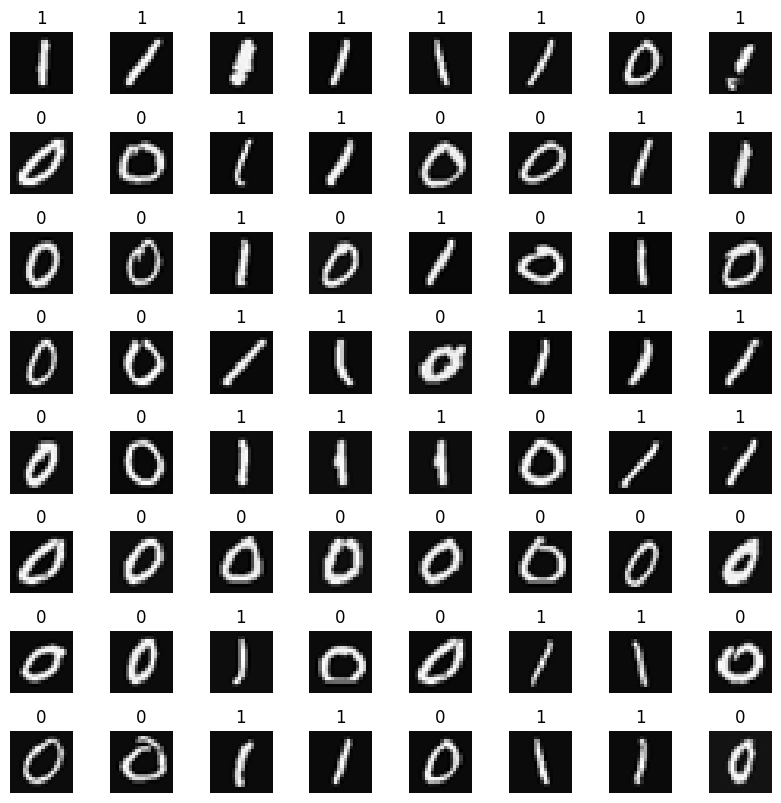

In [16]:
X = np.load("./data/digit_0_1_X.npy")
real_y = np.load("./data/digit_0_1_y.npy")  # 数据只有0，1两类，所以期望输出页只有一个数（0或1），real_y实际上是个一维向量
X = X[:1000]
real_y = real_y[:1000] #前一千个是0和1，后面是其他数字

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(real_y[random_index,0])
    ax.set_axis_off()

接下来生成模型并训练

In [7]:
neural_network = NeuralNetwork(4, [400, 25, 15, 1])
# 这个模型的参数也是我从网课里面搬过来的，隐层有两层，第一层25个神经元，第二层15个神经元。
# 一个样本表示20*20个像素，所以输入层有400个神经元

neural_network.train(X, real_y, 0.001, 20)

第 1 个epoch训练完成
第 2 个epoch训练完成
第 3 个epoch训练完成
第 4 个epoch训练完成
第 5 个epoch训练完成
第 6 个epoch训练完成
第 7 个epoch训练完成
第 8 个epoch训练完成
第 9 个epoch训练完成
第 10 个epoch训练完成
第 11 个epoch训练完成
第 12 个epoch训练完成
第 13 个epoch训练完成
第 14 个epoch训练完成
第 15 个epoch训练完成
第 16 个epoch训练完成
第 17 个epoch训练完成
第 18 个epoch训练完成
第 19 个epoch训练完成
第 20 个epoch训练完成


接下来预测一下结果，看看正确率

In [9]:
ans_multilayer_perceptron = neural_network.predict(X)

# 预测结果是sigmoid函数的值，是0-1之间的实数，这里我们把0.5设为阈值来判断两类
for i in range(ans_multilayer_perceptron.shape[0]):
    if ans_multilayer_perceptron[i] < 0.5:
        ans_multilayer_perceptron[i] = 0
    else:
        ans_multilayer_perceptron[i] = 1
print("正确率：", 1 - np.sum(abs(ans_multilayer_perceptron - real_y)) / X.shape[0])

正确率： 0.998


可以看到这个神经网络正确率非常的高，证明我们的算法实现是正确的。

书中还提到了其他的神经网络，比如径向基网络。但只是简单介绍了一下，我也就不实现了。

### 四、支持向量机

这节承接第四章中的线性支持向量机，先看懂第四章的内容才能看这节。

另外书上的数学推导说了跟没说一样，能看懂就有鬼了，建议看这篇文章 [支持向量机的数学原理详细推导和一些优化技巧](https://zhuanlan.zhihu.com/p/413953469)，这个文章的推导讲的非常细。

#### 1. 核心思想

支持向量机的思想是把样本用某种方法从低维映射到高维，因为只要映射的维度足够高，总有一种映射方法能是样本线性可分。

映射方法就是核函数，并且核函数有一个特点：不用求出来样本最终到底是怎么映射的，就可以训练出模型并且分类。

具体的推导过程见我给的连接，还是非常的复杂的。

最终经过一系列眼花缭乱的数学操作，最终我们要求的对偶问题（dual problem）如下：

$$\begin{align}
&\max\limits_{\boldsymbol{\alpha}}Q(\boldsymbol{\alpha}) = \sum_{i=1}^{N}\alpha_i - \frac{1}{2}\sum_{i,j=1}^{N}\alpha_i\alpha_jy_iy_jK(\mathbf{x}_i\cdot\mathbf{x}_j) \\
&\text{s.t.}\sum_{i=1}^{N}y_i\alpha_i = 0 \\
&0 \leqslant \alpha_i \leqslant C,\quad i=1,\cdots,N
\end{align}
$$

再用每个支持向量，通过这个公式求出来$b$：

$$y_j[\sum_i^n(\alpha_iy_iK(\mathbf{x}_i\cdot\mathbf{x}_j) + b] - 1 = 0$$

求出来$\boldsymbol{\alpha}$和$b$之后就可以按照下面的判别函数进行分类：

$$f(\mathbf{x}) = \text{sgn}\{\sum_{i=1}^{N}\alpha_i^*y_iK(\mathbf{x}_i\cdot\mathbf{x}) + b^*\}$$

其中$K(\mathbf{x},\mathbf{x}')$是核函数，书上介绍了三种：

第一种是多项式函数：

$$K(\mathbf{x},\mathbf{x}') = ((\mathbf{x}\cdot\mathbf{x}')+1)^q$$

$q$为多项式次数。

第二种是径向基（RBF）函数（也可以叫高斯函数）：

$$K(\mathbf{x},\mathbf{x}') = \exp(-\frac{||\mathbf{x}-\mathbf{x}'||^2}{\sigma^2})$$

$\sigma$是宽度。采用径向基核函数的支持向量机相当于径向基神经网络，但是其位置、宽度、个数都是由训练过程确定的（径向基神经网络的这三个参数是认为划定的）。

第三种是$Sigmoid$函数：

$$K(\mathbf{x},\mathbf{x}')=\tanh(v(\mathbf{x}\cdot\mathbf{x}')+c)$$

采用$Sigmoid$函数的支持向量机相当于一个三层神经网络（一个隐层），隐层节点个数就是支持向量的个数。

#### 2. 算法实现

那么现在的问题是，对偶问题如何求解？书上5.5.4节的标题叫支持向量机的实现算法，结果内容根本没说到底怎么实现。。。最后告诉你去调包。。。而且书上说的包还是个古董。。。

经过我查阅资料，这篇文章写的比较好 [5-支持向量机](https://www.cnblogs.com/stry/p/17028408.html)，这篇文章用到了SMO算法。

既然书上让我调包，也没有介绍具体的算法，那我也就调个包算了。

下面用到了sklearn库，这个库在机器学习中应用非常广泛，绝大多数初级的机器学习算法都能在里面找到。

In [6]:
from sklearn.svm import SVC

real_y = real_y.reshape((real_y.shape[0]))

# 数据集还是用上面的吴恩达的网课里面的手写数字识别

# 创建支持向量机分类器，核函数使用径向基函数
svm = SVC(kernel='rbf', C=1.0, random_state=42)

# 训练模型
svm.fit(X, real_y)

print('正确率:', svm.score(X, real_y))

正确率: 0.999


可以看到使用径向基作为核函数的SVM正确率更高，而且相比于前面的多层感知机神经网络，计算时间短的可以忽略不计。是一门优势很大的算法

### 五、核Fisher判别

这个方法基于Fisher线性判别，将样本通过核函数投影到高维上再进行线性判别。

具体公式推导书上说的比较清楚。但是有一个很主要的问题是：只给出了计算高位投影的方法，没给出分类阈值的计算方法。

这个问题其实在线性Fisher判别时就存在，书上假设样本按照同协方差正态分布，给出了这一假设下的判别阈值。但是观察上一章的数据可以发现，就算我是按照正态分布生成的样本（`np.random.randn()`生成的是正态分布），并且保证样本线性可分，如果两组样本离得比较近的情况下，按照书上给的阈值判别是不准确的。

具体算法如下：

1. 算出$\boldsymbol{\alpha}$

$$\begin{aligned}
\mathbf{M}_i &= \frac{1}{l_i}\sum_{k=1}^{l_i}
    \left[\begin{matrix}
        K(\mathbf{x}_1, \mathbf{x}_k^i)\\
        K(\mathbf{x}_2, \mathbf{x}_k^i)\\
        \vdots \\
        K(\mathbf{x}_l, \mathbf{x}_k^i)
    \end{matrix}\right]\\
\mathbf{K}_j &=
    \left[\begin{matrix}
        K(\mathbf{x}_1,\mathbf{x}_1^j) & K(\mathbf{x}_1,\mathbf{x}_2^j) & \cdots & K(\mathbf{x}_1,\mathbf{x}_{l_j}^j)\\
        K(\mathbf{x}_2,\mathbf{x}_1^j) & K(\mathbf{x}_2,\mathbf{x}_2^j) & \cdots & K(\mathbf{x}_2,\mathbf{x}_{l_j}^j)\\
        \vdots &\vdots &&\vdots\\
        K(\mathbf{x}_l,\mathbf{x}_1^j) & K(\mathbf{x}_l,\mathbf{x}_2^j) & \cdots & K(\mathbf{x}_l,\mathbf{x}_{l_j}^j)\\
    \end{matrix}\right]\\
\mathbf{N} &= \sum_{j=1,2}\mathbf{K}_j(\mathbf{I} - \mathbf{1}_{l_j})\mathbf{K}_j^\text{T}\\
\boldsymbol{\alpha} &\propto \mathbf{N}^{-1}(\mathbf{M}_1-\mathbf{M}_2)
\end{aligned}
$$

2. 算出样本投影值

$$<\mathbf{w},\Phi(\mathbf{x})> = \sum_{i=1}^l\alpha_iK(\mathbf{x}_i,\mathbf{x})$$

3. 投影值与阈值比较

接下来是代码实现：

In [12]:
def rbf(_x1: np.ndarray, _x2: np.ndarray, sigma2: float) -> float:
    """
    径向基函数
    :param _x1: 第一个向量
    :param _x2: 第二个向量
    :param sigma2: rbf的sigma参数的平方
    :return: 函数值
    """
    return np.exp(-np.sum((_x1 - _x2) ** 2) / sigma2)

def get_M_i(_X1: np.ndarray, _X2: np.ndarray, kernel) -> (np.ndarray, np.ndarray):
    """
    计算M矩阵
    :param _X1: 第一类样本矩阵（l1*d）
    :param _X2: 第二类样本矩阵（l2*d）
    :param kernel: 核函数
    :return: M矩阵
    """
    l1 = _X1.shape[0]
    l2 = _X2.shape[0]
    l = l1 + l2
    d = _X1.shape[1]
    _X = np.concatenate((_X1, _X2))

    # 核函数的参数sigma用1/(d*X.var())估计
    sigma2 = 1 / (d * _X.var())

    M1 = np.zeros(l)
    for i, x in enumerate(_X):
        for xk in _X1:
            M1[i] += kernel(x, xk, sigma2)
    M1 /= l1

    M2 = np.zeros(l)
    for i, x in enumerate(_X):
        for xk in _X2:
            M2[i] += kernel(x, xk, sigma2)
    M2 /= l2

    return M1, M2

def get_K(_X1: np.ndarray, _X2: np.ndarray, kernel) -> (np.ndarray, np.ndarray):
    """
    计算K1和K2
    :param _X1: 第一类样本矩阵（l1*d）
    :param _X2: 第二类样本矩阵（l2*d）
    :param kernel: 核函数
    :return: K1, K2
    """
    l1 = _X1.shape[0]
    l2 = _X2.shape[0]
    l = l1 + l2
    d = _X1.shape[1]
    _X = np.concatenate((_X1, _X2))

    # 核函数的参数sigma用1/(d*X.var())估计
    sigma2 = 1 / (d * _X.var())

    K1 = np.zeros((l, l1))
    K2 = np.zeros((l, l2))
    for i in range(l):
        for j in range(l1):
            K1[i][j] = kernel(_X[i], _X1[j], sigma2)
    for i in range(l):
        for j in range(l2):
            K2[i][j] = kernel(_X[i], _X2[j], sigma2)

    return K1, K2

def get_N(_X1: np.ndarray, _X2: np.ndarray, kernel) -> np.ndarray:
    """
    计算N
    :param _X1: 第一类样本矩阵（l1*d）
    :param _X2: 第二类样本矩阵（l2*d）
    :param kernel: 核函数
    :return: N
    """
    l1 = _X1.shape[0]
    l2 = _X2.shape[0]
    l = l1 + l2
    K1, K2 = get_K(_X1, _X2, kernel)
    N1 = K1 @ (np.eye(l1) - 1 / l1) @ K1.T
    N2 = K2 @ (np.eye(l2) - 1 / l2) @ K2.T

    return N1 + N2

def get_alpha(_X1: np.ndarray, _X2: np.ndarray, kernel) -> np.ndarray:
    """
    计算alpha
    :param _X1: 第一类样本矩阵（l1*d）
    :param _X2: 第二类样本矩阵（l2*d）
    :param kernel: 核函数
    :return: alpha
    """
    M1, M2 = get_M_i(_X1, _X2, kernel)
    return (M1 - M2) @ np.linalg.inv(get_N(_X1, _X2, kernel)).T

def get_projection(_alpha: np.ndarray, _X: np.ndarray, x: np.ndarray, kernel) -> float:
    """
    计算最终的投影
    :param _alpha: 前面算出来的alpha
    :param _X: 全体样本矩阵
    :param x: 要计算投影的样本
    :param kernel: 核函数
    :return: 投影的数值
    """
    sigma2 = 1 / (_X.shape[1] * _X.var())
    ans = 0
    for i in range(_X.shape[0]):
        ans += kernel(_X[i], x, sigma2) * _alpha[i]
    return ans

In [14]:
# 数据还是用手写数字识别
print("开始计算alpha")
alphas = get_alpha(X[:500], X[500:], rbf)
print("alpha计算完成")
projections = []
print("开始计算投影")
for i in range(X.shape[0]):
    projections.append(get_projection(alphas, X, X[i], rbf))
print("投影计算完成")

开始计算alpha
alpha计算完成
开始计算投影
投影计算完成


In [47]:
print("第一类样本的投影的最小值为：{:.2f}，最大值为：{:.2f}".format(min(projections[:500]), max(projections[:500])))
print("第二类样本的投影的最小值为：{:.2f}，最大值为：{:.2f}".format(min(projections[500:]), max(projections[500:])))

第一类样本的投影的最小值为：5432568911181.67，最大值为：5432568911181.79
第二类样本的投影的最小值为：5937507748712.67，最大值为：5937507748712.77


显然可以看出两类不同样本投影后距离非常远，并且类内的样本距离很近，这说明核Fisher判别的效果很好。